safa ben algia 
mariem jebari

In [234]:
#1
import pandas as pd
df_client=pd.read_csv('clients.csv', header=0, index_col=0)
df_client

,Gender,Birth date,Annual Outcome,Annual Spending,Profession,Work experience,Family size
Customer ID,,,,,,,
Ahmed,Male,10/10/1993,24000,700,Healthcare,5,3
Sonia,Female,11/09/1998,25000,800,Engineer,2,2
Salma,Female,12/01/1991,24000,200,Lawyer,5,2
Walid,Male,10/01/1987,23500,250,Entertainment,4,3
Ramzi,Male,12/11/1995,25000,900,Doctor,3,2


In [235]:
#2
df_client.drop('Annual Outcome', axis=1, errors='ignore', inplace=True)
df_client.drop('Annual Spending', axis=1, errors='ignore', inplace=True)
df_client.drop('Profession', axis=1, errors='ignore', inplace=True)
df_client.drop('Work experience', axis=1, errors='ignore', inplace=True)
df_client

,Gender,Birth date,Family size
Customer ID,,,
Ahmed,Male,10/10/1993,3
Sonia,Female,11/09/1998,2
Salma,Female,12/01/1991,2
Walid,Male,10/01/1987,3
Ramzi,Male,12/11/1995,2


In [236]:
#3
df_client['Birth date']=pd.to_datetime(df_client['Birth date'])
df_client.dtypes
from datetime import datetime
df_client['age'] = df_client['Birth date'].apply(lambda date: datetime.now().year-date.year)
df_client.drop('Birth date', axis=1, errors='ignore', inplace=True)
df_client
mean_age=df_client['age'].mean()
def change(age) :
    if(age >mean_age):
        return 1
    else:
        return 0

df_client['adult']=df_client['age'].apply(lambda age:change(age))
df_client.drop('age',axis=1,errors='ignore',inplace=True )
df_client


,Gender,Family size,adult
Customer ID,,,
Ahmed,Male,3,0
Sonia,Female,2,0
Salma,Female,2,1
Walid,Male,3,1
Ramzi,Male,2,0


In [237]:
#4
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(df_client[['Gender']])
categories = ohe.categories_[0]
encoded_gender=ohe.transform(df_client[['Gender']])
encoded_gender=encoded_gender.toarray()
encoded_gender
df_encoded_gender=pd.DataFrame(encoded_gender, 
                                    index=df_client.index,
                                    columns='gender_'+categories)
df_encoded_gender
df_client = pd.concat([df_client, df_encoded_gender] ,  axis=1)
df_client.drop('Gender',axis=1,errors='ignore',inplace=True )
df_client

,Family size,adult,gender_Female,gender_Male
Customer ID,,,,
Ahmed,3,0,0.0,1.0
Sonia,2,0,1.0,0.0
Salma,2,1,1.0,0.0
Walid,3,1,0.0,1.0
Ramzi,2,0,0.0,1.0


In [238]:
#5
min_familysize=df_client['Family size'].min()
max_familysize=df_client['Family size'].max()
df_client['Family size'] = df_client['Family size'].apply(lambda size: (size-min_familysize)/(max_familysize-min_familysize) )
df_client

,Family size,adult,gender_Female,gender_Male
Customer ID,,,,
Ahmed,1.0,0,0.0,1.0
Sonia,0.0,0,1.0,0.0
Salma,0.0,1,1.0,0.0
Walid,1.0,1,0.0,1.0
Ramzi,0.0,0,0.0,1.0


In [239]:
#6
import numpy as np
np.set_printoptions(precision=2)
X=df_client.values
np.mean(X , axis=0)
np.var(X , axis=0)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X)
X_ss = ss.transform(X)
np.mean(X_ss , axis=0)
np.var(X_ss, axis=0)
np.cov(X_ss.T , ddof=0)
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_ss)
pca.explained_variance_ratio_
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_ss)
X_pca=pca.transform(X_ss)
X_pca
df_client_proc=pd.DataFrame(X_pca, index=df_client.index)
df_client_proc.to_csv("client_2.csv", header=None, index=True)

In [240]:
#7
import pandas as pd
df_client = pd.read_csv("client_2.csv", header=None, index_col=0)
df_client
X = df_client.values
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,n_init=10)
km.fit(X)
km.cluster_centers_

array([[-1.28, -0.08],
       [ 1.92,  0.12]])

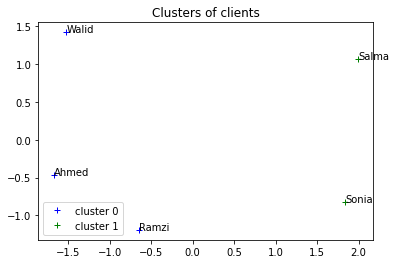

In [241]:
#8
labels = km.predict(X)
cluster0=X[labels==0]
cluster1=X[labels==1]
import matplotlib.pyplot as plt

plt.plot(cluster0[:,0],cluster0[:,1],"b+", label="cluster 0")
plt.plot(cluster1[:,0],cluster1[:,1],"g+", label="cluster 1")

for nom, x, y in zip(df_client.index,X[:,0],X[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

plt.legend()
plt.title('Clusters of clients')
plt.show()

In [242]:
#9
import numpy as np
new_client = np.array([['sondes',1, '04/02/2000','Female']])
label=km.predict(new_client)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(new_client)
X_ss = ss.transform(new_client)




ValueError: could not convert string to float: 'sondes'